In [33]:
# Name: Chloe Dang
# SJSU ID: 014291862
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
patient_url = "https://www.sjsu.edu/people/wendy.lee/docs/CS185C/heart_disease_clinical_data.csv"

patient_data = pd.read_csv(patient_url)
print(patient_data.info())
print(patient_data[(patient_data["DEATH_EVENT"]==0)].describe())
print(patient_data[(patient_data["DEATH_EVENT"]==1)].describe())
patient_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB
None
             

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [34]:
corr_matrix = patient_data.corr()
corr_matrix["DEATH_EVENT"].sort_values(ascending=False)

DEATH_EVENT                 1.000000
serum_creatinine            0.294278
age                         0.253729
high_blood_pressure         0.079351
anaemia                     0.066270
creatinine_phosphokinase    0.062728
diabetes                   -0.001943
sex                        -0.004316
smoking                    -0.012623
platelets                  -0.049139
serum_sodium               -0.195204
ejection_fraction          -0.268603
time                       -0.526964
Name: DEATH_EVENT, dtype: float64

In [35]:
# There are no missing values
incomplete_rows = patient_data[patient_data.isnull().any(axis=1)]
incomplete_rows

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT


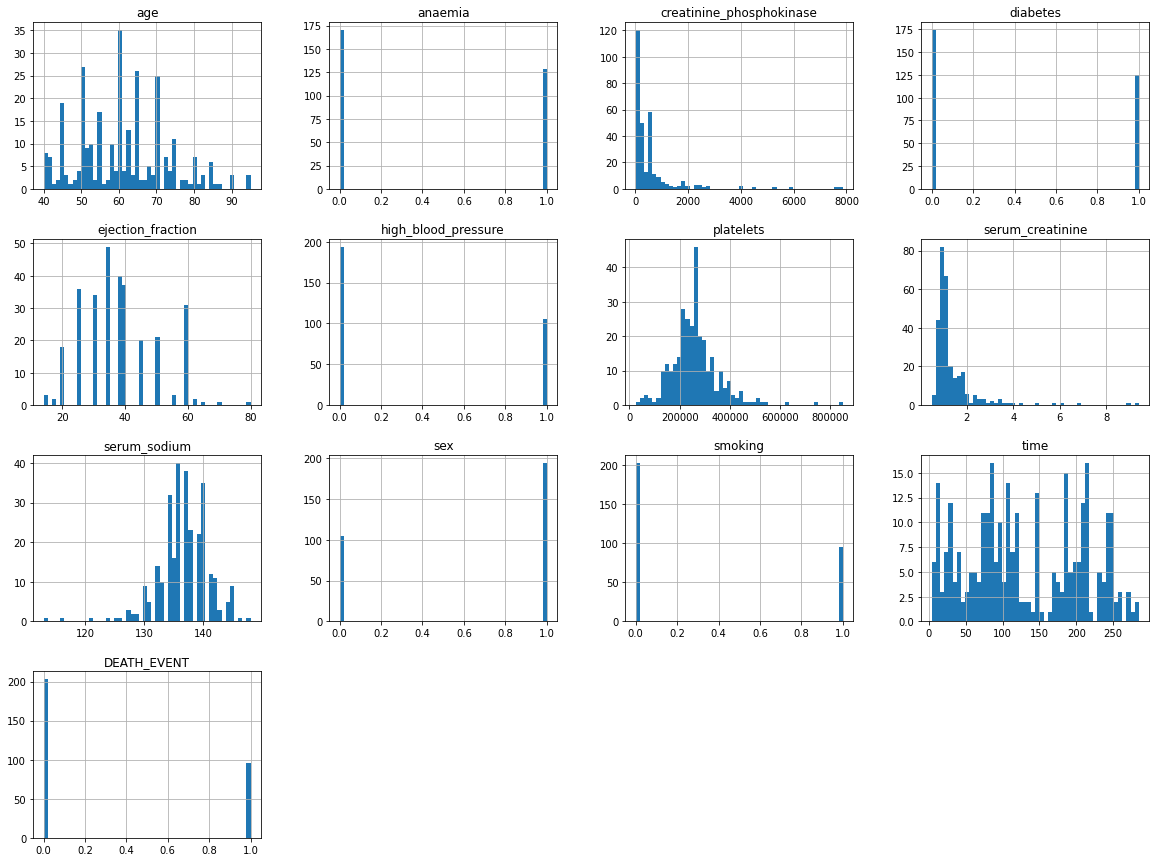

In [36]:
patient_data.hist(bins=50, figsize=(20,15))
plt.show()

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/seaborn/algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.7/dist-packages/seaborn/algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.7/dist-packages/seaborn/algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.7/dist-packages/seaborn/algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.7/dist-packages/seaborn/algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.7/dist-packages/seaborn/algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
/

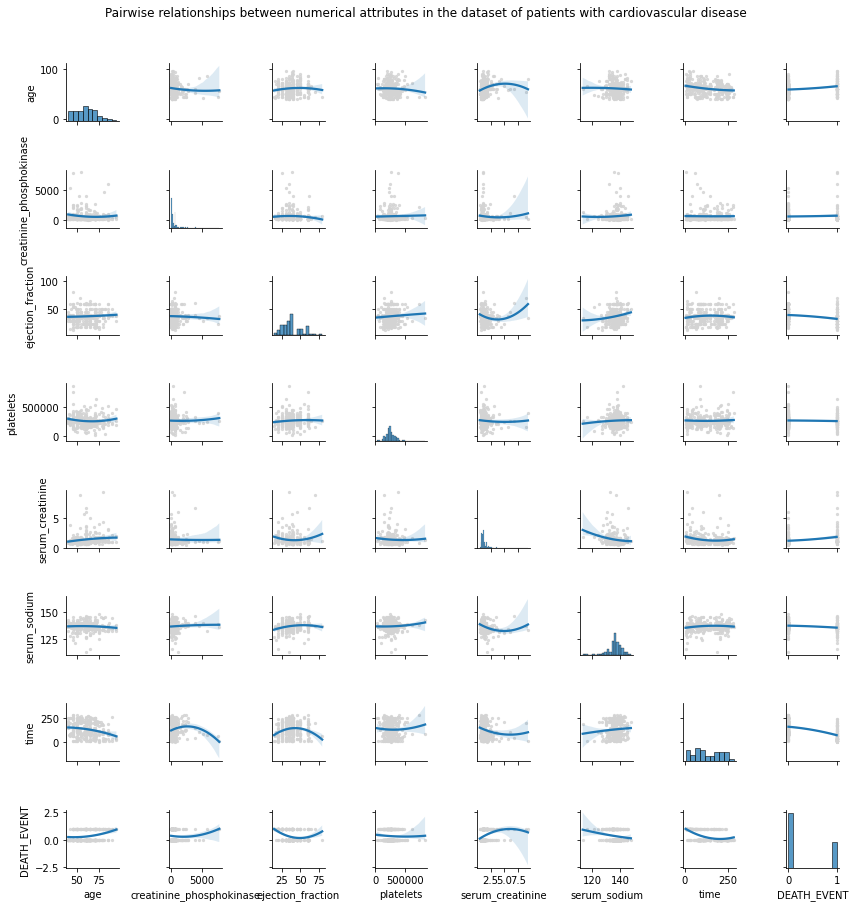

In [37]:
import seaborn as sns
g=sns.pairplot(
    data=patient_data.drop(["anaemia","diabetes","high_blood_pressure","sex","smoking"], axis=1),
    kind="reg", # regression
    plot_kws={"scatter_kws":{"color":"lightgrey", "s":5}, "order":2},
    height=1.5 # make the individual plots small
);
g.fig.suptitle(
    "Pairwise relationships between numerical attributes in the dataset of patients with cardiovascular disease", y=1.05
);

### Create and answer at least 5 unique questions using different types of plots to help you understand the data. You can create additional categorical columns or reshape your data to help you understand the data.



### Question 1: How do the levels of serum creatinine and the ejection fraction associate with the death or survival of patients with cardiovascular disease?


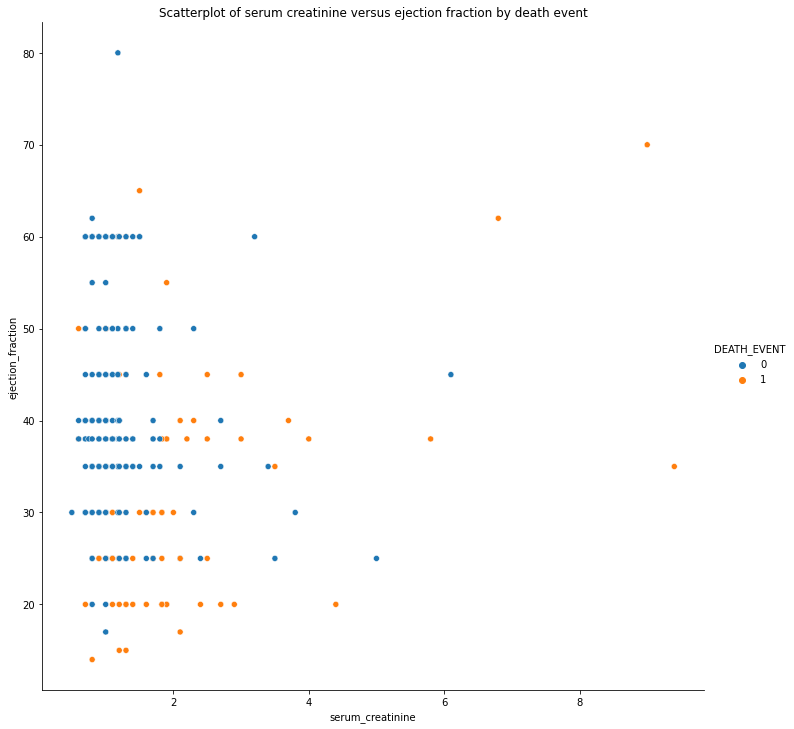

In [38]:
sns.relplot(
    data=patient_data,
    x="serum_creatinine",
    y="ejection_fraction",
    hue = "DEATH_EVENT",
    aspect=1,
    height=10,
)
plt.title("Scatterplot of serum creatinine versus ejection fraction by death event");

Observations:
1. Elevated `serum_creatinine` is associated with death by cardiovascular disease.
2. Extremely low `ejection_fraction` is associated with death by cardiovascular disease.


### Question 2: How are female or male patients with or without anaemia, high blood pressure, or diabetes, or who smoke or do not smoke, associated with dying or surviving during the follow-up period?



In [39]:
cat_df = patient_data[["anaemia","diabetes","high_blood_pressure","smoking","sex","DEATH_EVENT"]]

In [40]:
tidy_cat_df = cat_df.melt(
    id_vars=['DEATH_EVENT'], # column that you want to keep unchanged
    var_name="Categorical Feature", # header for the summary columns
    value_name="False/True" # header for the values
)
tidy_cat_df
deceased = tidy_cat_df[(tidy_cat_df.DEATH_EVENT==1)]
alive =  tidy_cat_df[(tidy_cat_df.DEATH_EVENT==0)]
tidy_cat_df.value_counts()

DEATH_EVENT  Categorical Feature  False/True
0            high_blood_pressure  0             137
             smoking              0             137
             sex                  1             132
             anaemia              0             120
             diabetes             0             118
                                  1              85
             anaemia              1              83
             sex                  0              71
             high_blood_pressure  1              66
             smoking              1              66
1            smoking              0              66
             sex                  1              62
             high_blood_pressure  0              57
             diabetes             0              56
             anaemia              0              50
                                  1              46
             diabetes             1              40
             high_blood_pressure  1              39
             sex   

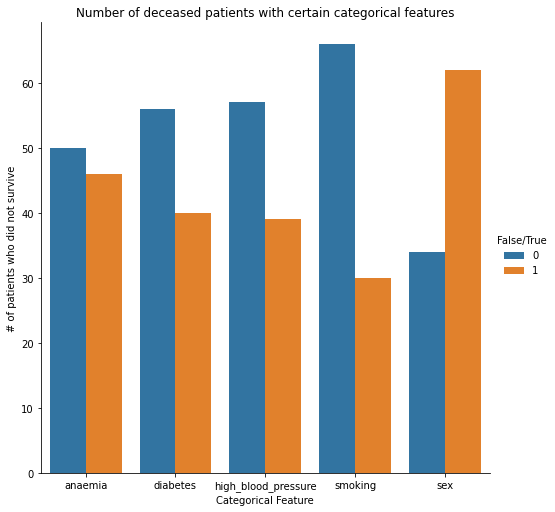

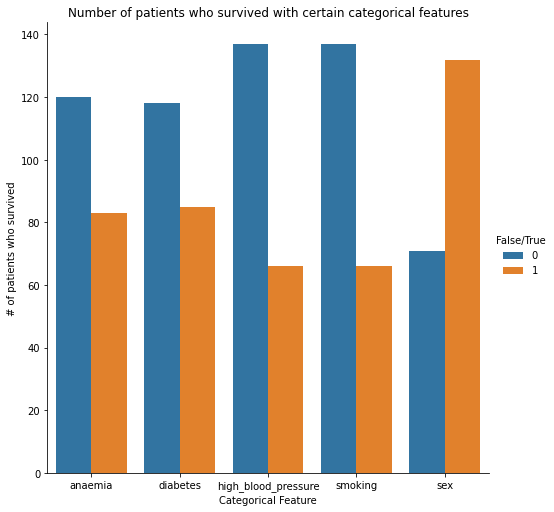

In [41]:
sns.catplot(
    x='Categorical Feature',
    data=deceased,
    hue = "False/True",
    kind='count',
    height = 7,
    aspect = 1,
).set_axis_labels('Categorical Feature', '# of patients who did not survive');
plt.title("Number of deceased patients with certain categorical features");
sns.catplot(
    x='Categorical Feature',
    data=alive,
    hue = "False/True",
    kind='count',
    height = 7,
    aspect = 1,
).set_axis_labels('Categorical Feature', '# of patients who survived');
plt.title("Number of patients who survived with certain categorical features");

Observations:
1. More male than female patients passed away during the follow-up period.
2. Out of the patients who survived, there are more who did not have anaemia, diabetes, or high blood pressure, or did not smoke compared to those who did satisfy any of those conditions.
3. Out of the patients who died, there are more who did not have anaemia, diabetes, or high blood pressure, or did not smoke compared to those who did satisfy any of those conditions.

### Question 3: Is there a correlation between the age and genders of patients with cardiovascular disease in surviving or dying during the follow-up periodd?

In [42]:
age_sex_df = patient_data[["age", "sex", "DEATH_EVENT"]]

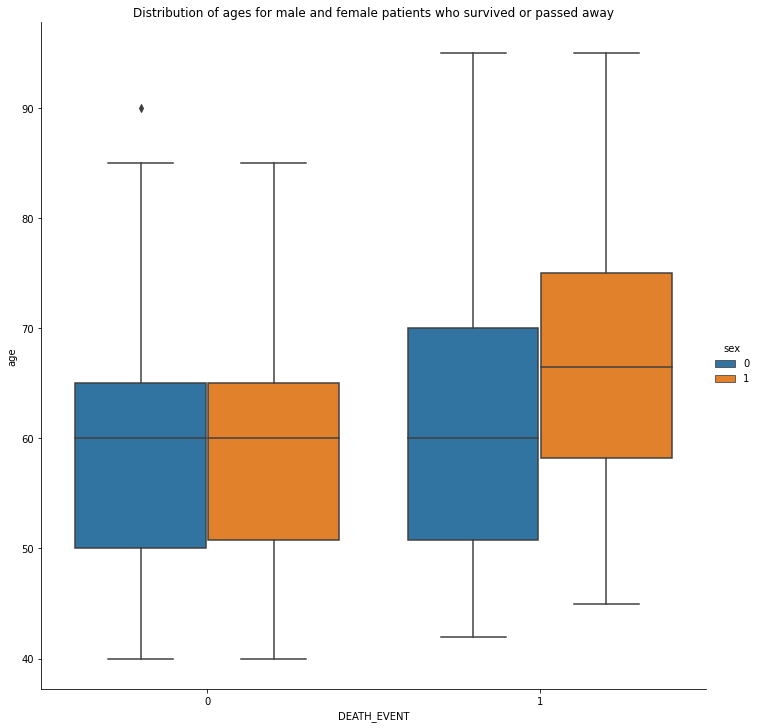

In [43]:
sns.catplot(
    data=age_sex_df, 
    x="DEATH_EVENT",
    y="age",
    aspect=1, # aspect change the aspect ratio
    kind="box",
    height=10,
    hue = "sex",
    ) 
plt.title("Distribution of ages for male and female patients who survived or passed away");

Observations:
1. Out of the patients who survived, there is a similar distribution of ages amongst male and female patients.
2. There are more older male patients who passed away compared to younger male patients who survived. There are also older female patients--younger than the older male patients who did not survive though--who did not survive in comparison to the younger female patients who did survive.
3. Overall, the older in `age` patients are, they may have a higher risk of passing away due to cardiovascular diease in the follow-up period.

### Question 4:


In [44]:
num_df = patient_data[["creatinine_phosphokinase","platelets","serum_sodium", "DEATH_EVENT"]]
def divide(num):
    return (num/1000)
num_df['platelets'] = num_df['platelets'].apply(divide)
#num_df[(num_df["serum_sodium"] < 135) & (num_df["DEATH_EVENT"]==1)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


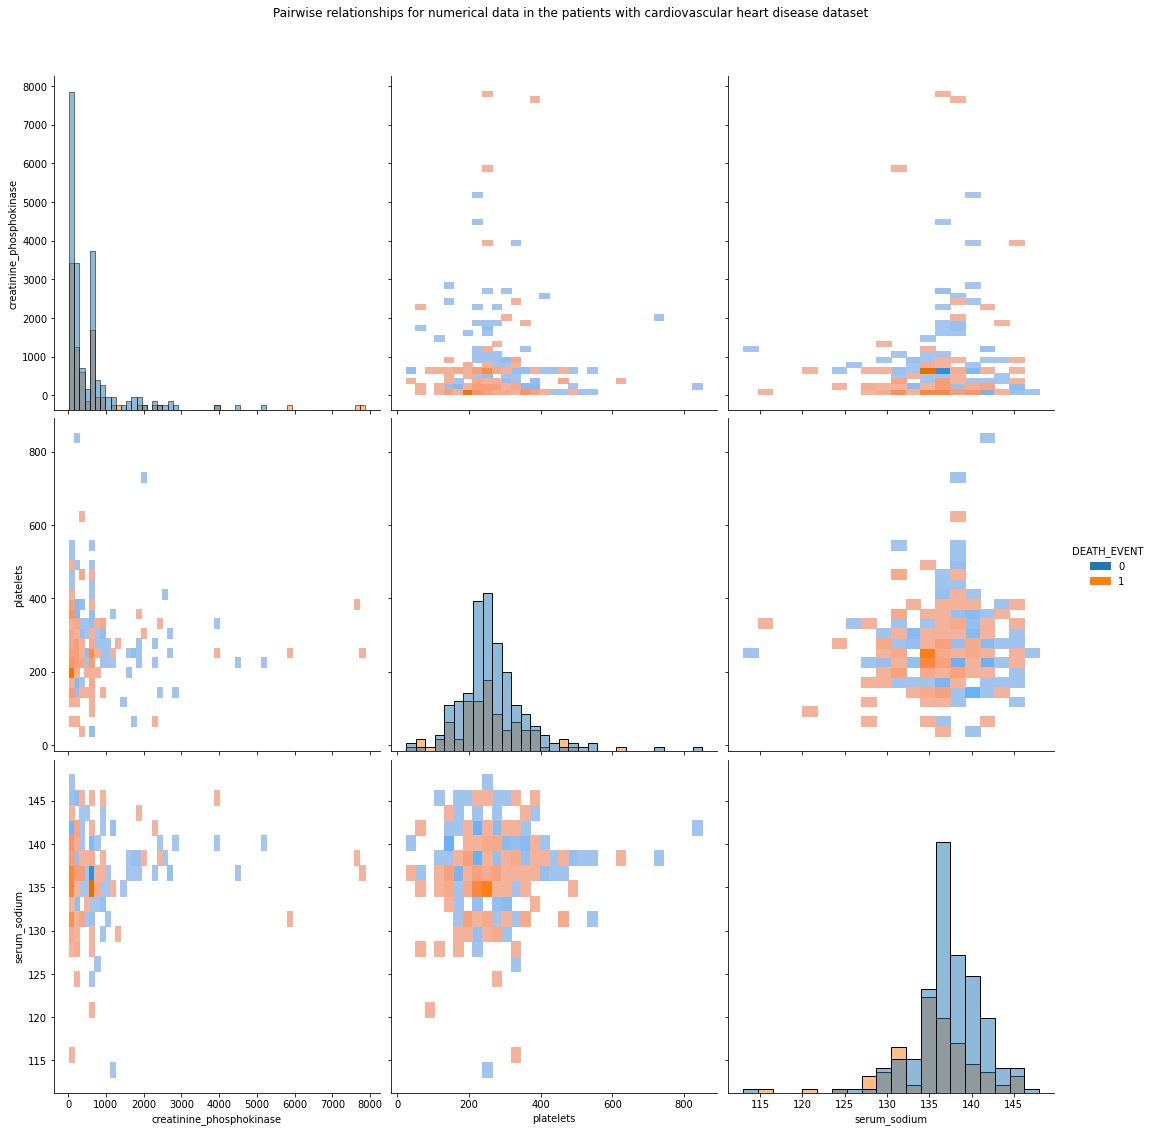

In [45]:
# Polynomial pair plot
g=sns.pairplot(
    data = num_df,
    hue = "DEATH_EVENT",
    height=5,
    kind="hist",
    #markers=["o", "x"],
    #plot_kws={'s': 5},
);
g.fig.suptitle(
    "Pairwise relationships for numerical data in the patients with cardiovascular heart disease dataset", y=1.05
);

Observations:
1. Both patients who survived or died, had high CPK levels above the normal range, most likely due to having cardiovascular disease.
2. Patients who passed away or survived had serum sodium levels that mainly fell in the normal range which is 135 - 145 milliequivalents per liter.
3. These numerical features may not be the best to use as predictors for survival as both the patients who survived or died had levels out of the normal range for each numerical feature.

### Question 5: How many patients died / survived during monthly follow-up periods?



In [46]:
import numpy as np

time_df = patient_data[["time"]]
#time_df = time_df[time_df['DEATH_EVENT']==0]
time_df.loc[time_df["time"] <= 30] = 1
time_df.loc[(time_df["time"] > 30) & (time_df["time"] <= 60)] = 2
time_df.loc[(time_df["time"] > 60) & (time_df["time"] <= 90)] = 3
time_df.loc[(time_df["time"] > 90) & (time_df["time"] <= 120)] = 4
time_df.loc[(time_df["time"] > 120) & (time_df["time"] <= 150)] = 5
time_df.loc[(time_df["time"] > 150) & (time_df["time"] <= 180)] = 6
time_df.loc[(time_df["time"] > 180) & (time_df["time"] <= 210)] = 7
time_df.loc[(time_df["time"] > 210) & (time_df["time"] <= 240)] = 8
time_df.loc[(time_df["time"] > 240) & (time_df["time"] <= 270)] = 9
time_df.loc[(time_df["time"] > 270) & (time_df["time"] <= 300)] = 10

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [47]:
time_patient_data = patient_data
time_patient_data['time'] = time_df['time']
time_patient_data = time_patient_data[['time', 'DEATH_EVENT']]

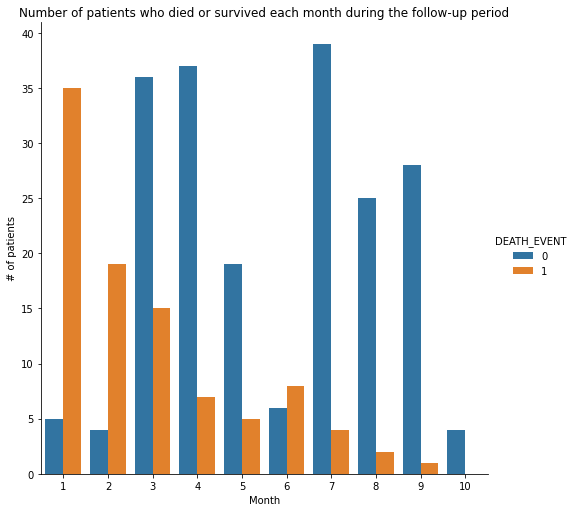

In [48]:
sns.catplot(
    x='time',
    data=time_patient_data,
    kind='count',
    hue = "DEATH_EVENT",
    height = 7,
    aspect = 1,
).set_axis_labels('Month', '# of patients');
plt.title("Number of patients who died or survived each month during the follow-up period");

Observations:
1. No correlation between the survival of patients to the follow-up month because the survival trend is not linear: there are less surviving patients in month 6 than month 5 and month 7.
2. No correlation between the death of patients to the follow-up month because the death trend is not linear: there are more patients who passed away in month 6 than month 4 and 5.
3. Although there is no clear linear correlation between follow-up month and survival or death, the follow-up period may still be included in the survival prediction analysis alongside other potential predictors.

### Create a test set and a training set using the original dataset.

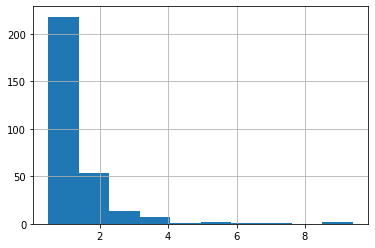

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

########################################
#### Prepare test and training sets ####
########################################
patient_data["serum_creatinine"].hist()
# Split the original dataset into test and training set. Set aside the test set.
# Do this before performing any imputation/transformation

Let's say the `serum_creatinine` amount is a very important attribute to predict `DEATH_EVENT`. We want to ensure that the test set is representative of the various categories of `serum_creatinine` in the whole dataset. Since the `serum_creatinine` is a continuous numerical attribute, we first need to create an `serum_creatinine` attribute. 

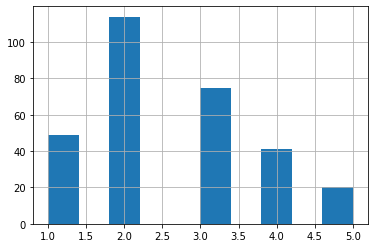

In [50]:
patient_data["serum_creatinine_attr"] = pd.cut(patient_data["serum_creatinine"],
                              bins=[0.0, 0.8, 1.1, 1.6, 2.5, np.inf],
                              labels=[1, 2, 3, 4, 5])

patient_data["serum_creatinine_attr"].hist()

In [51]:
#patient_data["age_attr"] = pd.cut(patient_data["age"],
                             # bins=[0.0, 46.0, 56.0, 66.0, 76.0, np.inf],
                              # labels=[1, 2, 3, 4, 5])

#patient_data["age_attr"].hist()

Let's compare the `serum_creatinine_attr` proportion in the overall dataset, in the test set generated with stratified sampling, and in a test set generated by using purely random sampling:

In [52]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(patient_data, patient_data["serum_creatinine_attr"]):
    strat_train_set = patient_data.loc[train_index]
    strat_test_set = patient_data.loc[test_index]
    
def serum_creatinine_attr_proportions(data):
    return data["serum_creatinine_attr"].value_counts() / len(data)

train_set, test_set = train_test_split(patient_data, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": serum_creatinine_attr_proportions(patient_data),
    "Stratified": serum_creatinine_attr_proportions(strat_test_set),
    "Random": serum_creatinine_attr_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.163880,0.166667,0.216667,32.210884,1.700680
2,0.381271,0.383333,0.300000,-21.315789,0.540936
3,0.250836,0.250000,0.233333,-6.977778,-0.333333
4,0.137124,0.133333,0.200000,45.853659,-2.764228
5,0.066890,0.066667,0.050000,-25.250000,-0.333333


As you can see, the test set generated using stratified sampling has `serum_creatinine_attr` proportions almost identical to those in the full dataset, whereas the test set generated using purely random sampling is quite skewed.

In [53]:
# Now we should remove the income_cat attribute so that 
# the data is back to its original state
for set_ in (strat_train_set, strat_test_set):
    set_.drop("serum_creatinine_attr", axis=1, inplace=True)
    
# Let's separate the predictors and the labels since we don't necessarily want to apply 
# the same transformations to the predictors and the target values. 
# Let's create a copy of the data and not affect strat_train_set:
patient_data = strat_train_set.drop("DEATH_EVENT", axis=1) # drop labels for training set
patient_data_labels = strat_train_set["DEATH_EVENT"].copy()
#patient_data_labels

In [54]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

patient_data_num = patient_data[["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium", "time",]]
patient_data_cat = patient_data[["anaemia","diabetes","high_blood_pressure","sex","smoking"]]

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),              # feature scaling
    ])

patient_data_num_tr = num_pipeline.fit_transform(patient_data_num)
#patient_data_num_tr 

In [55]:
## Convert the 2D array into Pandas DataFrame
cols=list(patient_data_num.columns)
patient_data_num_df = pd.DataFrame(
    patient_data_num_tr,
    columns=cols,
    index=patient_data.index)
patient_data_prep_df = pd.concat([patient_data_num_df, patient_data_cat], axis=1)
patient_data_prep_df

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anaemia,diabetes,high_blood_pressure,sex,smoking
256,0.371487,-0.277937,-0.006621,0.356035,0.286524,0.544052,1.217058,0,0,0,0,0
238,0.371487,0.100515,0.159945,-0.034746,-0.374563,-0.158804,0.827665,1,1,0,0,0
117,2.059956,-0.493097,1.825608,2.605667,1.703139,0.309766,-0.340516,1,0,0,0,0
136,0.371487,-0.534400,1.825608,-0.932486,-0.469004,0.075481,-0.340516,1,1,0,0,0
114,-0.050631,0.133173,0.159945,0.715132,-0.185681,-2.501658,-0.340516,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.202640,-0.097356,-1.089302,-0.066431,-0.091240,-0.627375,-0.729909,1,1,1,1,0
255,-0.726019,-0.407609,-0.672886,0.778501,-0.374563,1.246908,1.217058,1,1,1,1,1
87,0.371487,-0.525756,1.825608,0.461652,-0.563446,0.778337,-0.729909,1,1,1,1,0
285,-0.472748,-0.427781,0.159945,0.799625,-0.185681,-0.393090,1.606451,1,1,0,1,0


### Training and Evaluating on the Training Set
Testing Machine Learning Classifiers:


In [56]:
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42, solver='liblinear', multi_class='ovr', max_iter=1000)
clf = log_reg.fit(patient_data_prep_df,patient_data_labels)
scores = cross_val_score(clf, patient_data_prep_df, patient_data_labels, cv=10)
print("Logistic Regression Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

from sklearn.svm import SVC
SVC_sigmoid = SVC(kernel='sigmoid',gamma='auto',random_state=42).fit(patient_data_prep_df, patient_data_labels)
scores = cross_val_score(SVC_sigmoid, patient_data_prep_df, patient_data_labels, cv=5)
print("SVC w/ Sigmoid Kernel Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

from sklearn.svm import SVC
SVC_rbf = SVC(kernel='rbf',gamma='auto',random_state=42).fit(patient_data_prep_df, patient_data_labels)
scores = cross_val_score(SVC_rbf, patient_data_prep_df, patient_data_labels, cv=10)
print("SVC w/ RBF Kernel Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

from sklearn import svm
LinearSVC = svm.LinearSVC(max_iter=10000, random_state=42).fit(patient_data_prep_df, patient_data_labels)
scores = cross_val_score(LinearSVC, patient_data_prep_df, patient_data_labels, cv=10)
print("Linear SVC Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=42).fit(patient_data_prep_df, patient_data_labels)
scores = cross_val_score(RF, patient_data_prep_df, patient_data_labels, cv=5)
print("Random Forest Classifier Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

import sklearn as sk
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=10000, solver='adam', alpha=1e-5, activation="relu",hidden_layer_sizes=(5, 2), random_state=42)
NN = mlp.fit(patient_data_prep_df, patient_data_labels)
scores = cross_val_score(NN, patient_data_prep_df, patient_data_labels, cv=5)
print("Neural Network Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2));

Logistic Regression Accuracy: 0.81 (+/- 0.05)
SVC w/ Sigmoid Kernel Accuracy: 0.80 (+/- 0.09)
SVC w/ RBF Kernel Accuracy: 0.80 (+/- 0.08)
Linear SVC Accuracy: 0.81 (+/- 0.04)
Random Forest Classifier Accuracy: 0.78 (+/- 0.07)
Neural Network Accuracy: 0.79 (+/- 0.07)


LinearSVC has the highest accuracy with the lowest standard deviation in comparison to the other classifiers.

Apply GridSearch and RandomizedSearch for Fine-Tuning:

In [57]:
from sklearn.model_selection import GridSearchCV

param_grid = [ 
       {'C': [1, 10, 20, 30],
       'intercept_scaling': [1.0, 5.0]
       }
]

LinearSVC = svm.LinearSVC(max_iter=100000, random_state=42)

lsvc_grid_search = GridSearchCV(LinearSVC, param_grid, cv=5,scoring='accuracy', return_train_score=True).fit(patient_data_prep_df, patient_data_labels)

cvres = lsvc_grid_search.cv_results_

print("GridSearch Results:")

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

print(lsvc_grid_search.best_params_)
print(lsvc_grid_search.best_estimator_)

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'C': randint(low=1, high=30),
        'intercept_scaling': randint(low=1, high=10),
    }

lsvc_rnd_search = RandomizedSearchCV(LinearSVC, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='accuracy', 
                                random_state=21)
lsvc_rnd_search.fit(patient_data_prep_df, patient_data_labels)
cvres = lsvc_rnd_search.cv_results_

print("RandomizedSearch Results:")

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
   print(mean_score, params)

print(lsvc_rnd_search.best_params_)
print(lsvc_rnd_search.best_estimator_)

GridSearch Results:
0.7907801418439717 {'C': 1, 'intercept_scaling': 1.0}
0.7949468085106384 {'C': 1, 'intercept_scaling': 5.0}
0.7907801418439717 {'C': 10, 'intercept_scaling': 1.0}
0.7907801418439717 {'C': 10, 'intercept_scaling': 5.0}
0.7907801418439717 {'C': 20, 'intercept_scaling': 1.0}
0.7907801418439717 {'C': 20, 'intercept_scaling': 5.0}
0.7907801418439717 {'C': 30, 'intercept_scaling': 1.0}
0.7907801418439717 {'C': 30, 'intercept_scaling': 5.0}
{'C': 1, 'intercept_scaling': 5.0}
LinearSVC(C=1, intercept_scaling=5.0, max_iter=100000, random_state=42)
RandomizedSearch Results:
0.7907801418439717 {'C': 10, 'intercept_scaling': 9}
0.7907801418439717 {'C': 5, 'intercept_scaling': 1}
0.7907801418439717 {'C': 17, 'intercept_scaling': 9}
0.7907801418439717 {'C': 4, 'intercept_scaling': 3}
0.7907801418439717 {'C': 18, 'intercept_scaling': 9}
0.7907801418439717 {'C': 15, 'intercept_scaling': 7}
0.7907801418439717 {'C': 27, 'intercept_scaling': 1}
0.7907801418439717 {'C': 15, 'intercept_

Upon reading the paper, "Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone," I decided to test out a Random Forest Classifier model with GridSearch and RandomizedSearch applied to achieve fine-tuned parameters.

In [58]:
from sklearn.model_selection import GridSearchCV

param_grid = [ 
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=42)

rfc_grid_search = GridSearchCV(RF, param_grid, cv=5,scoring='accuracy', return_train_score=True).fit(patient_data_prep_df, patient_data_labels)

cvres = rfc_grid_search.cv_results_

print("GridSearch Results:")

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

print(rfc_grid_search.best_params_)
print(rfc_grid_search.best_estimator_)

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

rfc_rnd_search = RandomizedSearchCV(RF, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='accuracy', 
                                random_state=21)
rfc_rnd_search.fit(patient_data_prep_df, patient_data_labels)
cvres = rfc_rnd_search.cv_results_

print("RandomizedSearch Results:")

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
   print(mean_score, params)

print(rfc_rnd_search.best_params_)
print(rfc_rnd_search.best_estimator_)

GridSearch Results:
0.7030141843971631 {'max_features': 2, 'n_estimators': 3}
0.723936170212766 {'max_features': 2, 'n_estimators': 10}
0.749113475177305 {'max_features': 2, 'n_estimators': 30}
0.7321808510638299 {'max_features': 4, 'n_estimators': 3}
0.7404255319148936 {'max_features': 4, 'n_estimators': 10}
0.8243794326241135 {'max_features': 4, 'n_estimators': 30}
0.811613475177305 {'max_features': 6, 'n_estimators': 3}
0.8075354609929078 {'max_features': 6, 'n_estimators': 10}
0.8367907801418439 {'max_features': 6, 'n_estimators': 30}
0.7867021276595745 {'max_features': 8, 'n_estimators': 3}
0.8326241134751774 {'max_features': 8, 'n_estimators': 10}
0.8368794326241135 {'max_features': 8, 'n_estimators': 30}
0.7154255319148938 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.7489361702127659 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.7696808510638298 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.8034574468085106 {'bootstrap': False, 'max

Random Forest Classifier achieved a higher accuracy of approximately 0.845 in comparison to Linear SVC's highest accuracy of approximately 0.795.

Testing LinearSVC and RFC models on the test set:

In [59]:
feature_importances = rfc_rnd_search.best_estimator_.feature_importances_
display(feature_importances)
attributes = ["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium", "time","anaemia","diabetes","high_blood_pressure","sex","smoking"]
sorted(zip(feature_importances, attributes), reverse=True)

array([3.96259370e-02, 1.55969983e-02, 2.59785926e-01, 1.28579501e-02,
       1.59503227e-01, 2.16909418e-02, 4.85003179e-01, 0.00000000e+00,
       0.00000000e+00, 5.15899555e-03, 6.52830645e-04, 1.24014105e-04])

[(0.485003179450896, 'time'),
 (0.2597859257649913, 'ejection_fraction'),
 (0.15950322729800873, 'serum_creatinine'),
 (0.0396259369725451, 'age'),
 (0.02169094181686176, 'serum_sodium'),
 (0.015596998329570674, 'creatinine_phosphokinase'),
 (0.012857950066865586, 'platelets'),
 (0.005158995549322316, 'high_blood_pressure'),
 (0.0006528306454526706, 'sex'),
 (0.00012401410548589873, 'smoking'),
 (0.0, 'diabetes'),
 (0.0, 'anaemia')]

With this information, the top three most important features are `time`, `ejection_fraction`, and `serum_creatinine`.

In [60]:
X_test = strat_test_set.drop("DEATH_EVENT", axis=1)
y_test = strat_test_set["DEATH_EVENT"].copy()

X_test_num = X_test[["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium", "time",]]
X_test_cat = X_test[["anaemia","diabetes","high_blood_pressure","sex","smoking"]]

X_test_num_arr = num_pipeline.transform(X_test_num)

## Convert the 2D array into Pandas DataFrame
cols=["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium", "time",]
X_test_num_prepared = pd.DataFrame(
    X_test_num_arr,
    columns=cols,
    index=X_test_num.index)
X_test_prepared = pd.concat([X_test_num_prepared, X_test_cat], axis=1)
X_test_prepared

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anaemia,diabetes,high_blood_pressure,sex,smoking
198,-0.894865,-0.032039,-1.505718,0.197611,-0.374563,-0.627375,0.827665,1,1,1,0,0
161,-1.316983,-0.466202,-0.256470,-0.911363,-0.563446,0.544052,0.048878,1,0,0,1,1
78,1.215721,-0.396083,-0.006621,0.239857,-0.752328,-1.330231,-0.729909,1,1,1,1,1
122,-0.050631,-0.498861,-0.006621,-0.341034,-0.610666,0.778337,-0.340516,0,1,0,0,0
14,-0.979289,-0.514229,-0.672886,1.760735,-0.374563,0.309766,-1.508696,1,0,1,0,0
88,-1.401406,-0.510387,0.159945,-0.267102,-0.657887,0.544052,-0.729909,0,1,1,1,0
22,0.624757,-0.379754,-0.256470,0.303227,-0.469004,0.778337,-1.508696,1,0,1,1,1
152,-0.894865,-0.480610,0.576361,-0.805746,-0.469004,-0.627375,-0.340516,0,0,1,1,1
195,1.384568,-0.189567,0.576361,-0.393842,0.380965,1.949764,0.438271,1,0,0,1,0
146,-0.726019,-0.464281,-0.672886,-0.446650,-0.657887,-0.158804,-0.340516,0,0,0,1,1


In [61]:
LSVC_final_model = lsvc_grid_search.best_estimator_
lsvc_final_predictions = LSVC_final_model.predict(X_test_prepared)

#print("Accuracy of the Linear SVC model with test data:", 
    # LSVC_final_model.score(X_test_prepared, y_test))

RFC_final_model = rfc_rnd_search.best_estimator_
rfc_final_predictions = RFC_final_model.predict(X_test_prepared)

print("Accuracy of the Random Forest Classifier model with test data:", 
     round(RFC_final_model.score(X_test_prepared, y_test),4))

Accuracy of the Random Forest Classifier model with test data: 0.8667


Random Forest Classifier model achieved a higher accuracy on the test set than the Linear SVC model.

Now let's plot ROC and precision-recall curves to compare the performances of the ML Classifiers used:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. U

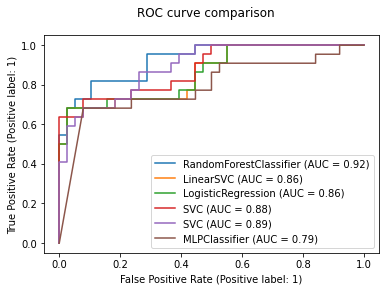

In [62]:
from sklearn import metrics
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt

rfc_disp = plot_roc_curve(RFC_final_model, X_test_prepared, y_test)
lsvc_disp = plot_roc_curve(LSVC_final_model, X_test_prepared, y_test, ax=rfc_disp.ax_)
log_reg_disp = plot_roc_curve(log_reg, X_test_prepared, y_test, ax=rfc_disp.ax_)
SVC_sigmoid_disp = plot_roc_curve(SVC_sigmoid, X_test_prepared, y_test, ax=rfc_disp.ax_)
SVC_rbf_disp = plot_roc_curve(SVC_rbf, X_test_prepared, y_test, ax=rfc_disp.ax_)
mlp_rbf_disp = plot_roc_curve(mlp, X_test_prepared, y_test, ax=rfc_disp.ax_)
rfc_disp.figure_.suptitle("ROC curve comparison")

plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use o

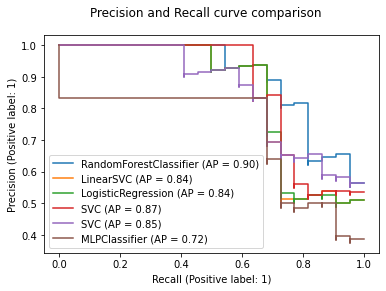

In [63]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

rfc_disp = plot_precision_recall_curve(RFC_final_model, X_test_prepared, y_test)
lsvc_disp = plot_precision_recall_curve(LSVC_final_model, X_test_prepared, y_test, ax=rfc_disp.ax_)
log_reg_disp = plot_precision_recall_curve(log_reg, X_test_prepared, y_test, ax=rfc_disp.ax_)
SVC_sigmoid_disp = plot_precision_recall_curve(SVC_sigmoid, X_test_prepared, y_test, ax=rfc_disp.ax_)
SVC_rbf_disp = plot_precision_recall_curve(SVC_rbf, X_test_prepared, y_test, ax=rfc_disp.ax_)
mlp_rbf_disp = plot_precision_recall_curve(mlp, X_test_prepared, y_test, ax=rfc_disp.ax_)
rfc_disp.figure_.suptitle('Precision and Recall curve comparison')

plt.show()

The Random Forest Classifier model had the best performance shown by the ROC and precision and recall curve plots.

Confusion matrix to show the performance of the Random Forest Classifier.

Confusion Matrix for Random Forest Classifier model:
[[37  1]
 [ 7 15]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


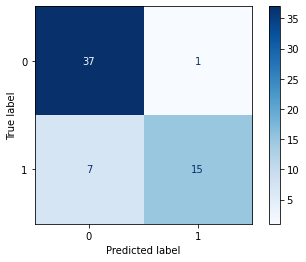

------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.97      0.90        38
           1       0.94      0.68      0.79        22

    accuracy                           0.87        60
   macro avg       0.89      0.83      0.85        60
weighted avg       0.88      0.87      0.86        60



In [64]:
from sklearn.metrics import plot_confusion_matrix
# Printing the confusion matrix
# The columns will show the instances predicted for each label,
# and the rows will show the actual number of instances for each label.
print("Confusion Matrix for Random Forest Classifier model:")
print(metrics.confusion_matrix(y_test, rfc_final_predictions, labels=[0,1]))
plot_confusion_matrix(RFC_final_model, X_test_prepared, y_test, cmap="Blues", values_format = '.0f')  
plt.show()  
# Printing the precision and recall, among other metrics
print("------------------------------------------------------")
print(metrics.classification_report(y_test, rfc_final_predictions, labels=[0,1]))